In [8]:
import math as ma
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time as ti
import scipy.linalg as la
import scipy
from scipy.integrate import odeint
def Matrix_form_generator(popsize,beta,gamma):
    size=popsize+1
    u=[[0.0 for i in range(size)] for j in range(size)]
    for i in range(1,size-1):
        u[i][i]= -i*(beta*(popsize-i)/popsize+gamma)
        u[i][i+1]=beta*i*(popsize-i)/popsize
        u[i][i-1]=gamma*i
    u[1][0]=gamma
    u[popsize-1][popsize]=beta
    u[popsize][popsize-1]=gamma*popsize
    u[popsize][popsize]=-gamma*popsize
    return np.array(u)
def prom(yvec):
    prom=0
    for i in range(len(yvec)): 
        prom+=i*yvec[i]
    return prom
popsize=1000
y0=[0.0 for i in range(popsize+1)]
y0[1]=1.0
y0=np.array(y0)
dt=0.001
beta=0.5
gamma=0.2
npuntos=50000
times=[0.0+i*dt for i in range(npuntos)]
times=np.array(times)
A=Matrix_form_generator(popsize,beta,gamma)
#
yprom=[]
ymax=[]
yvalp=y0
#Liu=la.expm(dt*A)
A=np.array(A)
Liu=np.identity(popsize+1)+dt*A#+dt*dt*np.dot(A,A)/2
prob0=[]
prob1=[]
prob2=[]
tmat=[]
for tval in times:
    #print(tval)
    yval = np.dot(yvalp,Liu)
    normal=np.sum(yval)
    print(normal,end="\r")
    #if normal<0.9 or normal>1.1:
    #    break
    if int(1000*tval)%100==0:
        tmat.append(yval/normal)
    yvalp=yval/normal
    #print(np.sum(yvalp))
    #print(np.sum(yvalp))
    #print(yval)
    #yprom.append(prom(yval))
    #ymax.append(np.argmax(yval[2:]))

    #print(np.sum(yval))

##---------------------- MID FIELD MODEL --------------------##


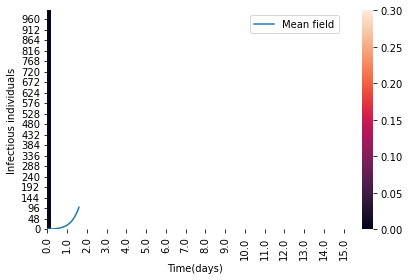

In [4]:
tmat=np.array(tmat)
#print(tmat)

sns.heatmap(tmat.T,vmax=0.3)
#plt.imshow(tmat)
plt.ylim(0,popsize+1)
plt.xticks(range(0,npuntos,1000),np.array(range(0,npuntos,1000))/1000)
plt.xlabel("Time(days)")
plt.ylabel("Infectious individuals")
plt.tight_layout()

def deriv(y, t, N, beta, gamma):
    I = y
    S=N-y
    dIdt = beta * S * I / N - gamma * I
    return dIdt

# initial condition
y0ode = 1.0

# time points

# solve ODE
y = odeint(deriv,y0ode,times,args=(popsize,beta,gamma))
times=times*100
# plot results
plt.plot(times,y,label="Mean field")
plt.legend()
plt.show()


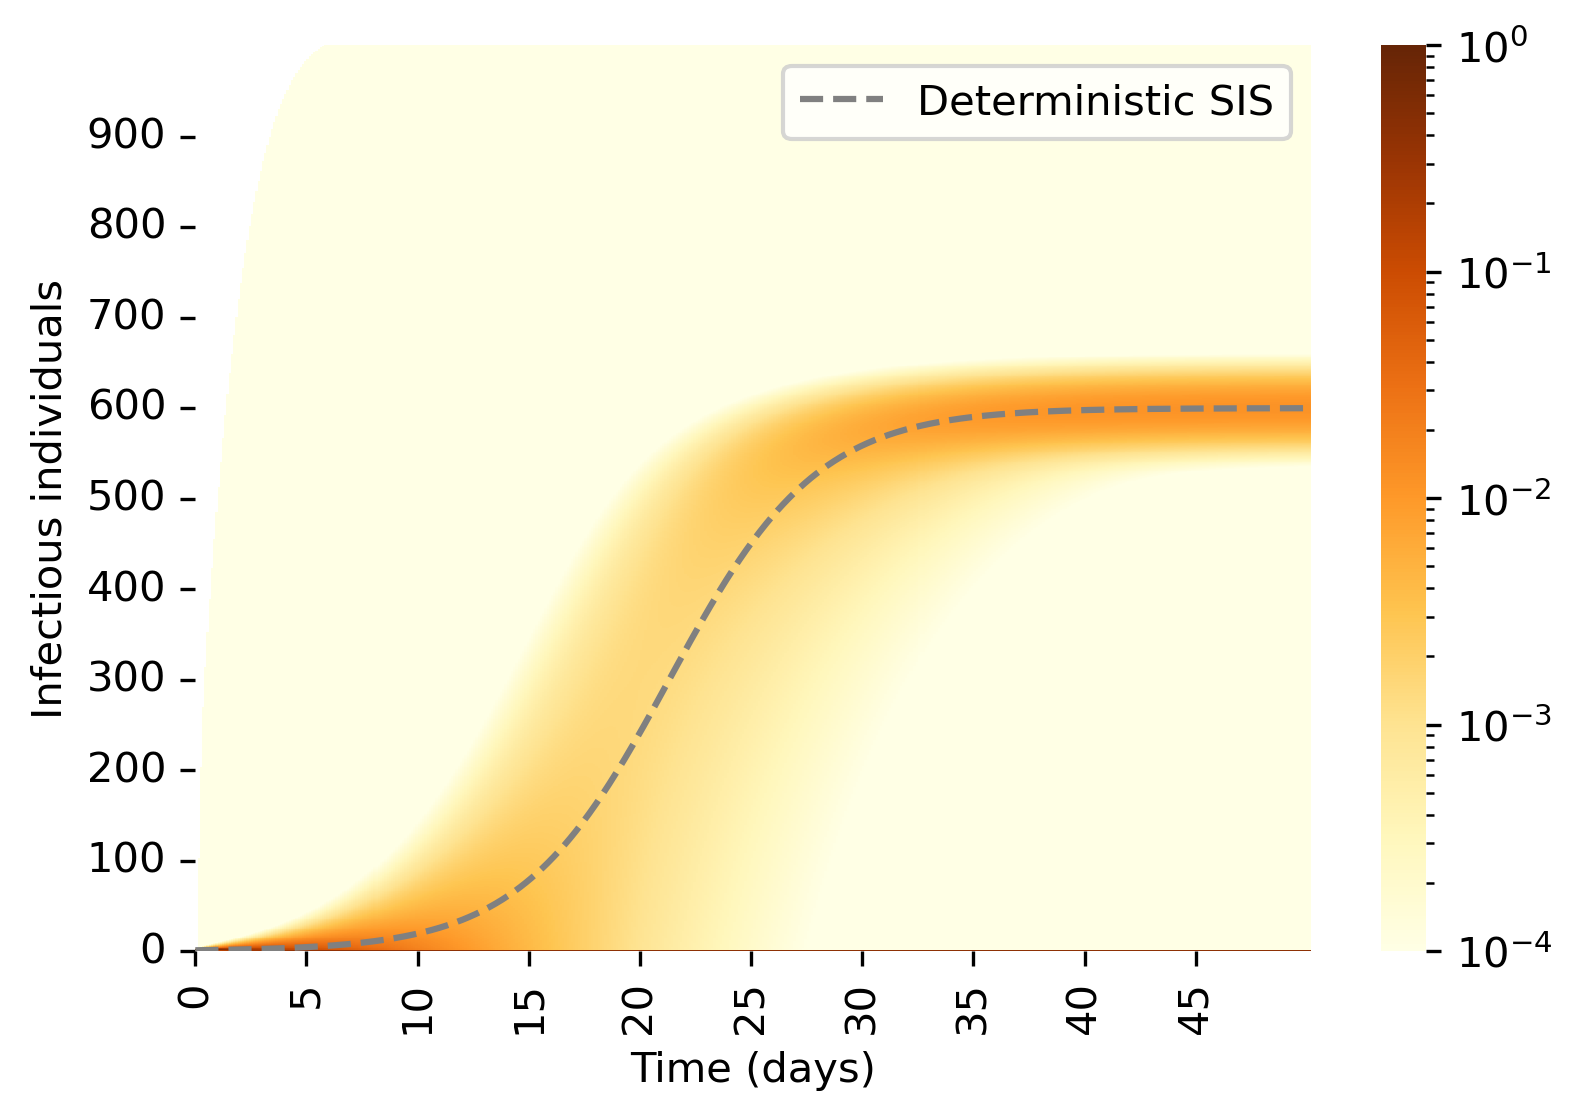

In [45]:
import matplotlib
from matplotlib.colors import LogNorm
matplotlib.rcParams['figure.dpi'] = 300
timeode=np.linspace(0,50,1000)
y = odeint(deriv,y0ode,timeode,args=(popsize,beta,gamma))
#times=times
# plot results
plt.plot(10*timeode,y,"--",label="Deterministic SIS",color="gray")
tmat=np.array(tmat)
sns.heatmap(tmat.T,cmap="YlOrBr",norm=LogNorm(vmin=0.0001, vmax=1))
plt.xticks(ticks=range(0,500,50),labels=range(0,50,5))
plt.yticks(ticks=range(0,1000,100),labels=range(0,1000,100))
plt.xlabel("Time (days)")
plt.ylabel("Infectious individuals")
plt.legend()
plt.ylim(0,popsize+1)
plt.legend()
plt.show()


In [26]:
import math as ma
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time as ti
import scipy.linalg as la
import scipy
from scipy.integrate import odeint
def Matrix_form_generator(popsize,beta,gamma):
    size=popsize+1
    u=[[0.0 for i in range(size)] for j in range(size)]
    for i in range(1,popsize):
        u[i][i]= -i*(beta*(popsize-i)/popsize+gamma)
        u[i][i+1]=beta*i*(popsize-i)/popsize
        u[i][i-1]=gamma*i
    u[1][0]=gamma
    u[popsize-1][popsize]=beta
    u[popsize][popsize-1]=gamma*popsize
    u[popsize][popsize]=-gamma*popsize
    return np.array(u)


popsize=1000
y0=[0.0 for i in range(popsize+1)]
y0[1]=1.0
y0t=np.array(y0).T
dt=0.1
beta=0.5
gamma=0.2
npuntos=502
times=[0.0+i*dt for i in range(npuntos)]
times=np.array(times)
A=Matrix_form_generator(popsize,beta,gamma)
#print(A[1])
yprom=[]
ymax=[]
yvalp=y0t
Liu=la.expm(dt*A).T
prob0=[]
prob1=[]
prob2=[]
tmat2=[]
for tval in times:
    yval = np.dot(Liu,yvalp)
    yvalp=yval
    #print(yval)
    #yprom.append(prom(yval))
    #ymax.append(np.argmax(yval[2:]))
    tmat2.append(yval.T)
    #print(np.sum(yval.T))


tmat2=np.array(tmat2)
#sns.heatmap(tmat2.T,vmax=0.3)
#plt.ylim(0,popsize+1)
#plt.xticks(range(0,npuntos,100),np.array(range(0,npuntos,100))/100)
#plt.xlabel("Time(days)")
#plt.ylabel("Infectious individuals")
#plt.tight_layout()

In [32]:
np.sum(abs(tmat+tmat2))

1003.9999999999426

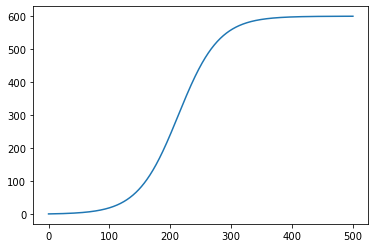

In [40]:
timeode=np.linspace(0,50,1000)
y = odeint(deriv,y0ode,timeode,args=(popsize,beta,gamma))
#times=times
# plot results
plt.plot(10*timeode,y)